# י **יער אקראי ($Random$ $Forest$)** י  

## **1. מבוא**  
י $Random$ $Forest$ הוא מודל למידת מכונה מסוג $Ensemble$, המבוסס על שילוב של מספר רב של עצי החלטה ($Decision$ $Trees$). י  
י השיטה פותחה כהרחבה של $Bagging$, ומטרתה **להקטין שונות ($Variance$)** תוך שמירה על הטיה נמוכה ($Low$ $Bias$). י  

**י עיקרון המפתח:** י  
י במקום לאמן עץ החלטה יחיד, מאמנים מספר רב של עצים על דגימות שונות של הנתונים ($Bootstrap$), ובכל פיצול בעץ נבחרת **תת-קבוצה אקראית של משתנים** ($Features$). י  
י כך מתקבלים עצים שונים, והתחזית מתקבלת על ידי ממוצע (ברגרסיה) או הצבעת רוב (בסיווג). י  

---

## **2. עקרונות השיטה**

### **2.1 $Bagging$ ו-$Bootstrap$**
- **י $Bagging$** היא שיטה שבה בכל איטרציה **נבחרת דגימת $Bootstrap$** (דגימה עם החזרה) מתוך סט האימון, ומאומן עליה מודל (כגון עץ החלטה). י  
- לאחר אימון מספר רב של מודלים, משלבים (אוגמים) את התחזיות שלהם לקבלת תחזית סופית: י  
  - בסיווג: הצבעת רוב. י  
  - ברגרסיה: ממוצע. י  

### **2.2 מה מייחד את $Random$ $Forest$ לעומת $Bagging$?**
י הרחבה שחלה ביער אקראי לעומת $Bagging$ רגיל היא שבכל פיצול של עץ, במקום לבחור את הפיצול הטוב ביותר מתוך **כל** המשתנים, בוחרים את הפיצול הטוב ביותר מתוך **תת-קבוצה אקראית** של המשתנים. י  
י **תוצאה:** ירידה בקורלציה בין העצים, מה שמקטין שונות ומשפר דיוק. י  

---

## **3. אלגוריתם יער אקראי**

1. **י דגימות $Bootstrap$:** י  
   - בוחרים $B$ דגימות $Bootstrap$ מתוך הסט המקורי בגודל $N$. י  
   - ממוצע הדגימות שיופיעו בכל דגימה הוא כ-63% מהמדגם המקורי. י  

2. **י בניית עצים:** י  
   - עבור כל דגימת $Bootstrap$, מאמנים עץ החלטה מלא. י  
   - **י בכל פיצול בעץ**, בוחרים אקראית $m$ משתנים (מתוך $p$), ומתוכם בוחרים את המשתנה לפיצול. י  

3. **י חיזוי:** י  
   - **י ברגרסיה:** התחזית היא ממוצע התחזיות של כל העצים. י  
   - **י בסיווג:** התחזית היא הצבעת הרוב של כל העצים. י  

4. **י $Out-of-Bag$ $Score$ (אופציונלי):** י  
   - משתמשים בתצפיות שלא נכללו בכל עץ לבדיקת דיוק המודל ללא סט אימות חיצוני. י  

---

## **4. היפרפרמטרים מרכזיים**

1. **י `$n_estimators$`** – מספר העצים $B$. י  
2. **י `$max_features$`** – מספר המשתנים $m$ לבחירה בכל פיצול. י  
3. **י `$max_depth$`** – עומק מקסימלי של כל עץ (למניעת $Overfitting$). י  
4. **י `$min_samples_split$`** – מינימום דגימות לפיצול צומת. י  
5. **י `$min_samples_leaf$`** – מינימום דגימות בעלה. י  
6. **י `$bootstrap$`** – האם להשתמש בדגימת $Bootstrap$ ($True$ ברוב המקרים). י  
7. **י `$oob_score$`** – אם $True$, מבצע חישוב אוטומטי של שגיאת $OOB$. י  

---

## **5. הפחתת שונות וחשיבות קורלציה בין העצים**
י ניתן להציג את השונות ביער אקראי בנוסחה: י  
$$
\text{Var}(\hat{f}_{RF}) = \rho \sigma^2 + \frac{(1 - \rho) \sigma^2}{B}
$$

- $\sigma^2$ – שונות של עץ יחיד. י  
- $\rho$ – קורלציה בין העצים. י  
- $B$ – מספר העצים. י  

📌 **מסקנה:** ככל שהקורלציה $\rho$ קטנה יותר, השונות הכוללת קטנה משמעותית. י  

---

## **6. $Out-of-Bag$ $(OOB)$ $Error$**
- כ-37% מהדגימות לא נכללות בכל עץ (בממוצע). י  
- ניתן להשתמש בהן כחלק מסט "בדיקה" פנימי להערכת ביצועי המודל. י  

---

## **7. מדדי חשיבות משתנים ($Feature$ $Importance$)**

1. **י $Gini/Entropy$** – סכום שיפורי מדד הטוהר בכל פיצול לכל משתנה. י  
2. **י $Permutation$ $Importance$** – בודקים כיצד ערבוב משתנה פוגע בביצועי המודל. י  
3. **י כלים מתקדמים ($LIME$, $SHAP$)** – מסבירים השפעת משתנים על חיזוי ספציפי. י  

---

## **8. יתרונות מול חסרונות**

### **8.1 יתרונות**
✔ **י דיוק גבוה ופחות רגישות ל-$Overfitting$**. י  
✔ **י מתאים לנתונים מורכבים ולא ליניאריים**. י  
✔ **י מספק מדדי חשיבות משתנים**. י  
✔ **י מאפשר חישוב $OOB$ $Score$ לחיסכון בבדיקות אימות חיצוניות**. י  

### **8.2 חסרונות**
❌ **י פחות ניתן לפרשנות עקב שילוב של עצים רבים**. י  
❌ **י דורש יותר חישובים בהשוואה לעץ יחיד**. י  
❌ **י רגיש לאקסטרפולציה בבעיות רגרסיה**. י  

---

## **9. טיפים לנתונים גדולים ורבים-ממדים**
1. **י הפחתת ממדים** – שימוש ב-$Feature$ $Selection$ לצמצום רעשים. י  
2. **י $Parallelization$** – ניתן לאמן עצים במקביל לניצול ליבות מרובות. י  
3. **י $Subsampling$** – לדגום רק חלק מהנתונים בכל איטרציה להאצת האימון. י  

---

## **10. דוגמה בסיסית ב-$Python$ (עם $scikit$-$learn$)**


Random Forest Accuracy: 0.8750


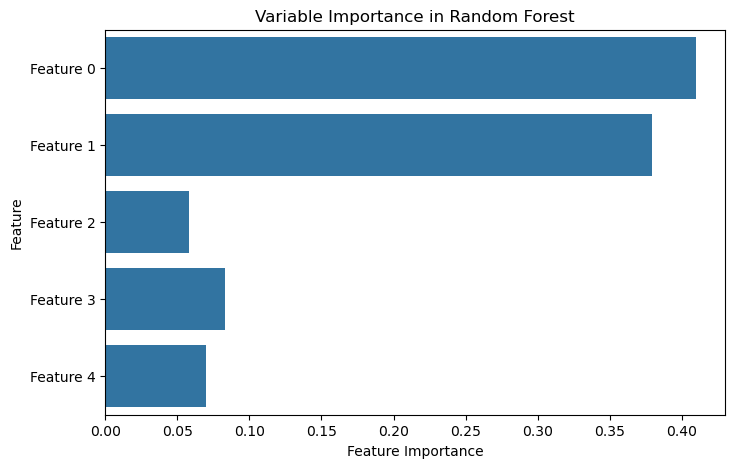

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# יצירת נתוני סיווג סינתטיים
np.random.seed(42)
X = np.random.rand(200, 5) * 10  # חמישה משתנים בלתי תלויים
Y = (X[:, 0] + X[:, 1] > 10).astype(int)  # מחלקה בינארית

# חלוקת הנתונים לסט אימון ובדיקה
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# בניית יער אקראי עם 100 עצים
rf_clf = RandomForestClassifier(n_estimators=100, max_features=int(np.sqrt(X.shape[1])), random_state=42)
rf_clf.fit(X_train, Y_train)

# חיזוי תוצאות
Y_pred = rf_clf.predict(X_test)

# הדפסת דיוק המודל
print(f"Random Forest Accuracy: {accuracy_score(Y_test, Y_pred):.4f}")

# ==========================
# הצגת חשיבות המשתנים
# ==========================
feature_importances = rf_clf.feature_importances_
plt.figure(figsize=(8,5))
sns.barplot(x=feature_importances, y=[f"Feature {i}" for i in range(X.shape[1])])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Variable Importance in Random Forest")
plt.show()

# י 📌 $Random$ $Forest$ – הסבר וביצוע סיווג י  

## י 📌 מה הקוד עושה? י  
- 🟢 **יוצר נתוני סיווג** עם **5 משתנים בלתי תלויים**. י  
- 🌲 **מאמן יער אקראי** עם **100 עצים**. י  
- 🎯 **מודד את דיוק המודל** על קבוצת הבדיקה. י  
- 🔥 **מציג את חשיבות המשתנים** כדי לזהות אילו תכונות השפיעו על הסיווג. י  

---

## י 📌 יתרונות וחסרונות של יערות אקראיים י  

| **יתרון** | **חיסרון** |  
|-----------|-----------|  
| יציב יותר מעצים בודדים | דורש יותר זמן חישוב |  
| מפחית שונות (**$Variance$**) | פחות אינטרפרטבילי מעץ יחיד |  
| יכול להתמודד עם נתונים עם הרבה משתנים | לא תמיד מצטיין בנתונים עם מספר קטן של תצפיות |  
| מספק **מדדי חשיבות משתנים** | לא תמיד מתאים לבעיות בהן דרושה **אינטרפרטציה פשוטה** |  

📌 **לכן, יערות אקראיים הם בחירה מצוינת כאשר רוצים מודל חזק, יציב ומדויק ללא $Overfitting$.** י  

---

## י 📌 סיכום י  

### י סיכום והמלצות י  
1. **י התחילו עם פרמטרים ברירת מחדל** (כמו `$n_estimators=100$`, `$max_features='sqrt'$`) והשתמשו ב-$OOB$ $Score$ או ב-$Cross$-$Validation$ כדי לבדוק ביצועים. י  
2. **י כוונון ($Tuning$)** – השתמשו ב-$Grid$ $Search$ או $Randomized$ $Search$ לכוונון פרמטרים כמו `$max_depth$`, `$min_samples_split$`, `$min_samples_leaf$` ועוד. י  
3. **י נתחו חשיבות משתנים** להבין אילו תכונות ($Features$) משמעותיות למודל ואלו שאולי גורמות לרעש. י  
4. **י בחינה ויזואלית** – ניתוח $Partial$ $Dependence$ $Plots$, או שימוש ב-$SHAP$/$LIME$, במידה וחשוב להבין פרשנות ברזולוציה גבוהה. י  
5. **י קחו בחשבון את זמן הריצה וכמות הזיכרון הנדרשת**, במיוחד כאשר הנתונים גדולים מאוד ($High$-$Dimensional$). י  

📌 **יערות אקראיים מהווים בחירה מצוינת לבעיות סיווג ורגרסיה רבות, בזכות איזון טוב בין דיוק גבוה, פשטות יחסית (קל ליישם) ויציבות.** עם זאת, לתרחישים הדורשים פרשנות גבוהה או זמן תגובה מהיר במיוחד, ייתכן ויידרשו שיקולים נוספים או מודלים אחרים (כגון $Gradient$ $Boosting$). י  

בסופו של דבר, **זהו מודל רב עוצמה וגמיש, שמומלץ לנסות כמעט בכל בעיית $ML$ כתו בסיסי או כמודל $Benchmark$ להשוואה מול שיטות מורכבות אחרות.** 🚀 י  
